In [1]:
%matplotlib inline
%pylab inline
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import palettable as pal
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [11]:
# sra_run = pd.read_csv('../SraRunInfo_719.csv')
# sra_map = sra_run[['Run', 'SampleName']]

In [34]:
# transrate scores
file_ncgr_transrate_scores = "../assembly_evaluation_data/transrate_imicrobe_scores.csv"
file_dib_transrate_scores = "../assembly_evaluation_data/transrate_scores_trinity-2.2.0.csv"

ncgr_transrate = pd.read_csv(file_ncgr_transrate_scores, index_col='SampleName')
#ncgr_transrate = pd.merge(sra_map,ncgr_transrate,on="SampleName")

dib_transrate = pd.read_csv(file_dib_transrate_scores, index_col='SampleName')
#dib_transrate = pd.merge(sra_map,dib_transrate,on="Run")

In [35]:
dib_transrate.head()

,assembly,n_seqs,smallest,largest,n_bases,mean_len,n_under_200,n_over_1k,n_over_10k,n_with_orf,...,p_contigs_uncovbase,contigs_uncovered,p_contigs_uncovered,contigs_lowcovered,p_contigs_lowcovered,contigs_segmented,p_contigs_segmented,score,optimal_score,cutoff
SampleName,,,,,,,,,,,,,,,,,,,,,
MMETSP1102,/mnt/home/ljcohen/mmetsp_assemblies_trinity2.2...,100847,201,14341,55390309,549.25093,0,12194,2,28587,...,0.31467,2912,0.02888,67843,0.67273,6881,0.06823,0.19251,0.32002,0.43046
MMETSP1416,/mnt/home/ljcohen/mmetsp_assemblies_trinity2.2...,32717,201,9345,31700139,968.91949,0,11513,0,18908,...,0.41572,1741,0.05321,16408,0.50151,1526,0.04664,0.33582,0.45389,0.33274
MMETSP0883,/mnt/home/ljcohen/mmetsp_assemblies_trinity2.2...,35078,201,16541,25939483,739.48010,0,7331,21,17132,...,0.33554,1447,0.04125,19702,0.56166,1888,0.05382,0.31668,0.49989,0.52635
MMETSP0042,/mnt/home/ljcohen/mmetsp_assemblies_trinity2.2...,35570,201,19515,33760198,949.11999,0,12195,22,20101,...,0.35451,2113,0.05940,14632,0.41136,1863,0.05238,0.38950,0.59841,0.49616
MMETSP0380,/mnt/home/ljcohen/mmetsp_assemblies_trinity2.2...,38153,201,2759,14903245,390.61791,0,993,0,6629,...,0.20305,789,0.02068,14557,0.38154,6954,0.18227,0.12455,0.20092,0.23493


In [36]:
ncgr_transrate.head()

,assembly,n_seqs,smallest,largest,n_bases,mean_len,n_under_200,n_over_1k,n_over_10k,n_with_orf,...,p_contigs_uncovbase,contigs_uncovered,p_contigs_uncovered,contigs_lowcovered,p_contigs_lowcovered,contigs_segmented,p_contigs_segmented,score,optimal_score,cutoff
SampleName,,,,,,,,,,,,,,,,,,,,,
MMETSP0909,/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MME...,17793,150,5295,13335459,726.32406,2371,4918,0,10343,...,0.62997,73,0.00410,2864,0.16096,5822,0.32721,0.08002,0.08486,0.02586
MMETSP1138,/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MME...,21907,150,13716,22494042,1016.92728,1248,8959,4,16594,...,0.75834,3558,0.16241,11314,0.51646,621,0.02835,0.15532,0.29205,0.46644
MMETSP0317,/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MME...,10424,150,14124,12824577,1225.50691,287,5182,5,8676,...,0.68314,1624,0.15579,4927,0.47266,142,0.01362,0.29773,0.48681,0.45753
MMETSP0370,/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MME...,54971,150,7545,41366781,725.22565,8621,15861,0,30166,...,0.67985,291,0.00529,21782,0.39625,2127,0.03869,0.17398,0.24414,0.41163
MMETSP1412,/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MME...,14977,150,11460,19276146,1275.26300,1015,7611,2,11261,...,0.66075,43,0.00287,3505,0.23403,1752,0.11698,0.22650,0.25427,0.32807


In [37]:
dib_transrate = dib_transrate.drop_duplicates()
ncgr_transrate = ncgr_transrate.drop_duplicates()

In [46]:
#checking the comparison of the two sets. 
ddd=set(dib_transrate.index) #special flowers are missing
ncnc=set(ncgr_transrate.index)
len(ddd.intersection(ncnc))

587

In [48]:
pd.merge(ncgr_transrate, dib_transrate, left_index=True, right_index=True).columns

Index(['assembly_x', 'n_seqs_x', 'smallest_x', 'largest_x', 'n_bases_x',
       'mean_len_x', 'n_under_200_x', 'n_over_1k_x', 'n_over_10k_x',
       'n_with_orf_x', 'mean_orf_percent_x', 'n90_x', 'n70_x', 'n50_x',
       'n30_x', 'n10_x', 'gc_x', 'gc_skew_x', 'at_skew_x', 'cpg_ratio_x',
       'bases_n_x', 'proportion_n_x', 'linguistic_complexity_x', 'fragments_x',
       'fragments_mapped_x', 'p_fragments_mapped_x', 'good_mappings_x',
       'p_good_mapping_x', 'bad_mappings_x', 'potential_bridges_x',
       'bases_uncovered_x', 'p_bases_uncovered_x', 'contigs_uncovbase_x',
       'p_contigs_uncovbase_x', 'contigs_uncovered_x', 'p_contigs_uncovered_x',
       'contigs_lowcovered_x', 'p_contigs_lowcovered_x', 'contigs_segmented_x',
       'p_contigs_segmented_x', 'score_x', 'optimal_score_x', 'cutoff_x',
       'assembly_y', 'n_seqs_y', 'smallest_y', 'largest_y', 'n_bases_y',
       'mean_len_y', 'n_under_200_y', 'n_over_1k_y', 'n_over_10k_y',
       'n_with_orf_y', 'mean_orf_percent_y

In [51]:
def scatter_diff(df1, df2, column, fig, ax, df1name = 'df1', df2name = 'df2', 
                 color1='#566573', color2='#F5B041', ymin=0, ymax=1, ypos=.95):
    # plot scatter differences between two dfs with the same columns
    # create new df for data comparison
    combined_df = pd.merge(df1, df2, left_index=True, right_index=True)
    newdf=pd.DataFrame(index=combined_df.index)
    newdf[df1name]=combined_df[column+'_x']
    newdf[df2name]=combined_df[column+'_y']

#     df1 = df1.sort_values(['SampleName'])
#     df2 = df2.sort_values(['SampleName'])
#     newdf[df1name] = df1[column]
#     newdf[df2name] = df2[column]
#     newdf['SampleName.DIB'] = df2['SampleName']
#     newdf['SampleName.NCGR'] = df1['SampleName']
#     newdf = newdf.dropna()
#     newdf = newdf.drop_duplicates()
    # plot with different colors if df1 > or < then df2
    newdf.loc[newdf[df1name] > newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                          color = color1, lw=2)
    newdf.loc[newdf[df1name] <= newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                           color = color2, alpha = 0.5, lw=2)
    ax.text(-.1, ypos, str(len(newdf.loc[newdf[df1name] > newdf[df2name]])), 
            color= color1, fontsize='x-large', fontweight='heavy')
    ax.text(.95, ypos, str(len(newdf.loc[newdf[df1name] <= newdf[df2name]])), 
            color= color2, fontsize='x-large', fontweight='heavy')

    # aesthetics 
    ax.set_xlim(-.15, 1.15)
    ax.set_ylim(ymin, ymax)
    ax.set_xticks([0,1])
    ax.set_xticklabels([df1name, df2name], fontsize='large', fontweight='bold')
#     ax.set_ylabel(column, fontsize='x-large')
    return newdf, fig, ax
    

def violin_split(df, col1, col2, fig, ax, color2='#566573', color1='#F5B041', ymin=0, ymax=1):
    #create split violine plots
    v1 = ax.violinplot(df[col1],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v1['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        b.set_color(color2)
        b.set_alpha(0.85)
    v2 = ax.violinplot(df[col2],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v2['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
        b.set_color(color1)
        b.set_alpha(0.85)
    ax.set_xticks([])
    ax.set_ylim([ymin, ymax])
    
def create_plots(df1, df2, column, col_title, df1name = 'NCGR', df2name = 'DIB', ymax = 1, ymin = 0, ypos = 0.95):
    fig, axs = plt.subplots(1,2)
    fig.set_size_inches(6,6)
    outdf, fig, ax = scatter_diff(df1, df2, column = column, 
                 fig = fig, ax = axs[0], df1name = df1name, df2name = df2name, 
                                  ymax = ymax, ymin = ymin, ypos = ypos)
    violin_split(outdf, df1name, df2name, fig, axs[1], ymin = ymin, ymax = ymax)
    fig.suptitle(col_title, fontsize = 'x-large', fontweight = 'bold')
    return outdf, fig, ax

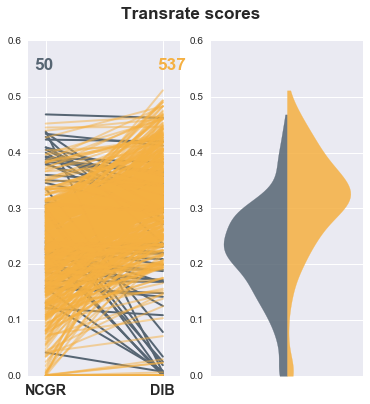

In [53]:
score,fig, ax = create_plots(ncgr_transrate,dib_transrate, 'score', 'Transrate scores',ymax=.6, ypos=0.55)

In [58]:
score[score['NCGR']>score['DIB']]

,NCGR,DIB
SampleName,,
MMETSP0011,0.12123,0.10862
MMETSP0017,0.23782,0.23686
MMETSP0046,0.21089,0.18760
MMETSP0098,0.39331,0.34134
MMETSP0121,0.24173,0.12519
MMETSP0127,0.22116,0.21882
MMETSP0149,0.39073,0.38254
MMETSP0150,0.38760,0.36596
MMETSP0152,0.30660,0.29300
